# Детектирование символов на изображении

Для распознавания используется нейронная сеть CRAFT https://github.com/clovaai/CRAFT-pytorch. Статья https://arxiv.org/abs/1904.01941

Для простоты ее применения используется easyOCR https://github.com/JaidedAI/EasyOCR, которая является просто оберткой для детектирования в методе detect

Примеры использования ниже

([[[38, 134, 20, 116], [134, 214, 24, 114], [208, 302, 24, 114], [300, 392, 24, 116], [390, 466, 26, 116], [462, 546, 24, 120], [542, 606, 30, 126], [42, 126, 156, 256], [124, 216, 156, 252], [214, 302, 156, 252], [302, 380, 160, 254], [376, 442, 158, 256], [440, 534, 158, 250], [532, 604, 160, 246], [38, 124, 290, 382], [122, 206, 290, 388], [200, 288, 288, 386], [284, 372, 290, 388], [368, 462, 288, 384], [460, 550, 288, 382], [546, 606, 290, 376], [38, 130, 422, 510], [126, 204, 420, 514], [200, 288, 414, 518], [284, 372, 420, 516], [372, 450, 422, 516], [448, 526, 424, 518], [522, 592, 422, 516], [32, 118, 548, 648], [116, 216, 554, 654], [210, 314, 556, 648], [312, 388, 558, 646], [386, 460, 558, 650], [456, 536, 558, 650], [534, 602, 558, 646], [212, 308, 690, 784], [308, 386, 692, 784], [382, 456, 690, 780]]], [[]])


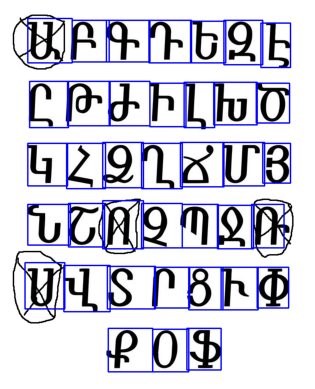

In [3]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

reader = easyocr.Reader([],gpu=False, recognizer=False, verbose=False)
imagePath = '../files/алфавит.png'
# imagePath = '../files/Пример1.png'
img = cv2.imread(imagePath)

# plt.imshow(img)
# plt.show()

# алфавит
# выделение каждого символа в алфавите полиномом
# result = reader.detect(img, min_size=10, text_threshold=0.7, low_text=0.4, link_threshold=1.0, slope_ths=0., ycenter_ths=0.5, height_ths=0., width_ths=0., add_margin=0.05, bbox_min_score=0.1, bbox_min_size=1)
# выделение каждого символа в алфавите прямоугольником
# result = reader.detect(img, min_size=10, text_threshold=0.7, low_text=0.4, link_threshold=1.0, slope_ths=0.1, ycenter_ths=0.5, height_ths=0., width_ths=0., add_margin=0.05, bbox_min_score=0.2, bbox_min_size=3)
result = reader.detect(img, min_size=10, text_threshold=0.5, low_text=0.4, link_threshold=1.0, slope_ths=0.1, ycenter_ths=0.5, height_ths=0., width_ths=0., add_margin=0., bbox_min_score=0.2, bbox_min_size=3)
# result = reader.detect(img)
print(result)

horizontal_rec = result[0][0]
# print(horizontal_rec)

free_region = result[1][0]

imgRec = img
for coord in horizontal_rec:
    (x_min, x_max, y_min, y_max) = coord
    cv2.rectangle(imgRec, (x_min,y_min), (x_max,y_max), (0, 0, 255), 2)
    # cv2.rectangle(imgRec, [x_min,y_min, x_max,y_max], (255, 0, 0), 2)
for coord in free_region:
    c_np = np.int32(np.array(coord))
    cv2.polylines(imgRec, [c_np], True, (0, 255, 0), thickness=4, lineType=8, shift=0) 
    

plt.imshow(imgRec)
plt.axis('off')
plt.show()

## Пример1.png

([[[441, 501, 45, 119], [1077, 1161, 275, 363], [139, 223, 431, 515], [1167, 1227, 745, 805], [1402, 1504, 818, 850]]], [[]])


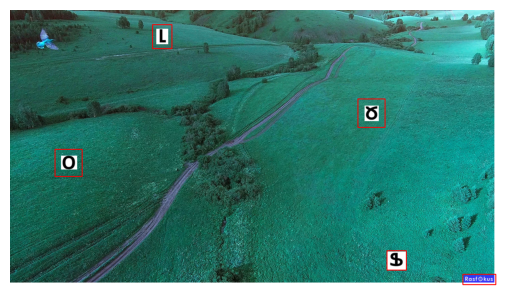

In [3]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

reader = easyocr.Reader([],gpu=False, recognizer=False, verbose=False)
# imagePath = '../files/алфавит.png'
imagePath = '../files/Пример1.png'
img = cv2.imread(imagePath)

# plt.imshow(img)
# plt.show()

result = reader.detect(img, min_size=40, text_threshold=0.3, low_text=0.1, link_threshold=1., slope_ths=0.5, ycenter_ths=0.5, height_ths=0., width_ths=0., add_margin=0.1, bbox_min_score=0.2, bbox_min_size=3)
# result = reader.detect(img)
print(result)

horizontal_rec = result[0][0]
# print(horizontal_rec)

free_region = result[1][0]

imgRec = img
for coord in horizontal_rec:
    (x_min, x_max, y_min, y_max) = coord
    cv2.rectangle(imgRec, (x_min,y_min), (x_max,y_max), (255, 0, 0), 2)
    # cv2.rectangle(imgRec, [x_min,y_min, x_max,y_max], (255, 0, 0), 2)
for coord in free_region:
    c_np = np.int32(np.array(coord))
    cv2.polylines(imgRec, [c_np], True, (0, 255, 0), thickness=4, lineType=8, shift=0) 
    

plt.imshow(imgRec)
plt.axis('off')
plt.show()

## Пример2.png

([[[641, 709, 33, 111], [203, 245, 295, 351], [570, 618, 460, 524]]], [[]])


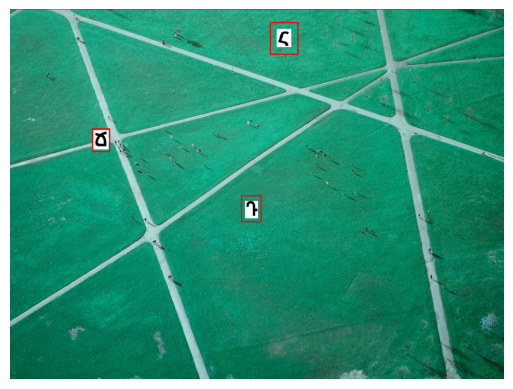

In [4]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

reader = easyocr.Reader([],gpu=False, recognizer=False, verbose=False)
# imagePath = '../files/алфавит.png'
imagePath = '../files/Пример2.png'
img = cv2.imread(imagePath)

# plt.imshow(img)
# plt.show()

result = reader.detect(img, min_size=30, text_threshold=0.1, low_text=0.1, link_threshold=1., slope_ths=0.5, ycenter_ths=0.5, height_ths=0., width_ths=0., add_margin=0.1, bbox_min_score=0.2, bbox_min_size=3)
# result = reader.detect(img)
print(result)

horizontal_rec = result[0][0]
# print(horizontal_rec)

free_region = result[1][0]

imgRec = img
for coord in horizontal_rec:
    (x_min, x_max, y_min, y_max) = coord
    cv2.rectangle(imgRec, (x_min,y_min), (x_max,y_max), (255, 0, 0), 2)
    # cv2.rectangle(imgRec, [x_min,y_min, x_max,y_max], (255, 0, 0), 2)
for coord in free_region:
    c_np = np.int32(np.array(coord))
    cv2.polylines(imgRec, [c_np], True, (0, 255, 0), thickness=4, lineType=8, shift=0) 
    

plt.imshow(imgRec)
plt.axis('off')
plt.show()

## Пример3.png

([[[1010, 1034, 346, 376], [1369, 1411, 445, 505], [321, 365, 729, 785], [1789, 1833, 715, 775], [1292, 1346, 958, 1024]]], [[]])


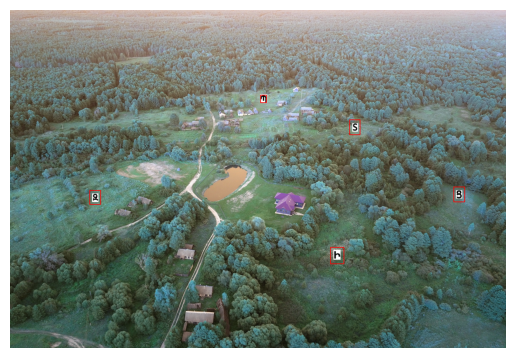

In [5]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

reader = easyocr.Reader([],gpu=False, recognizer=False, verbose=False)
imagePath = '../files/Пример3.png'
img = cv2.imread(imagePath)

# plt.imshow(img)
# plt.show()

result = reader.detect(img, min_size=20, text_threshold=0., low_text=0.1, link_threshold=1., slope_ths=0.5, ycenter_ths=0.5, height_ths=0., width_ths=0., add_margin=0.1, bbox_min_score=0.2, bbox_min_size=3)
print(result)

horizontal_rec = result[0][0]
# print(horizontal_rec)

free_region = result[1][0]

imgRec = img
for coord in horizontal_rec:
    (x_min, x_max, y_min, y_max) = coord
    cv2.rectangle(imgRec, (x_min,y_min), (x_max,y_max), (255, 0, 0), 2)
    # cv2.rectangle(imgRec, [x_min,y_min, x_max,y_max], (255, 0, 0), 2)
for coord in free_region:
    c_np = np.int32(np.array(coord))
    cv2.polylines(imgRec, [c_np], True, (0, 255, 0), thickness=4, lineType=8, shift=0) 
    

plt.imshow(imgRec)
plt.axis('off')
plt.show()